In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:

boston = pd.read_csv("boston_house_prices.csv", header = 1)

In [8]:

# Display the first few rows
print(boston.head())

# Check for missing values
print(boston.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [9]:
# Display summary statistics
print(boston.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [10]:

# MEDV is median house price
X = boston.drop(columns=['MEDV'])  # Features
y = boston['MEDV']  # Target variable


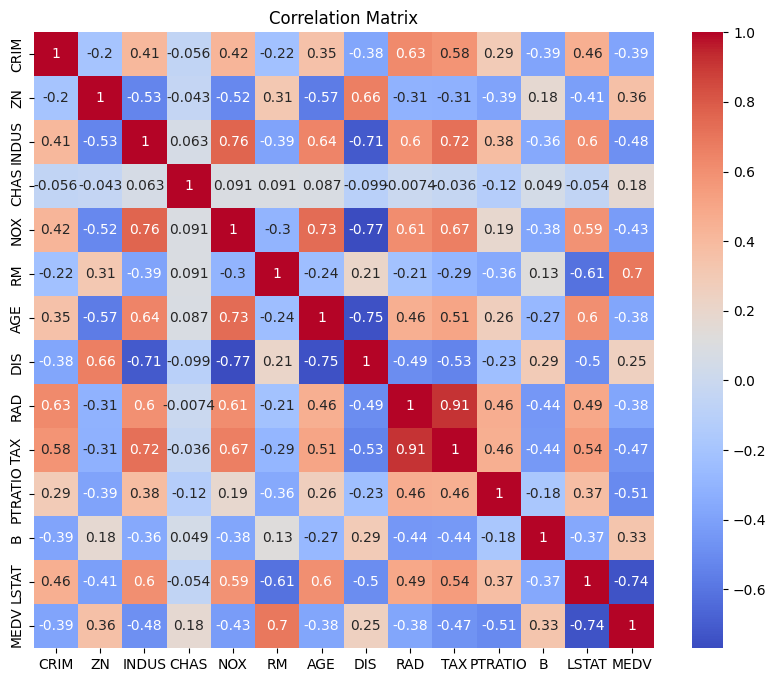

In [11]:

# Example: Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(boston.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [14]:

y_pred = regression.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24.29111947497418
R-squared: 0.6687594935356229


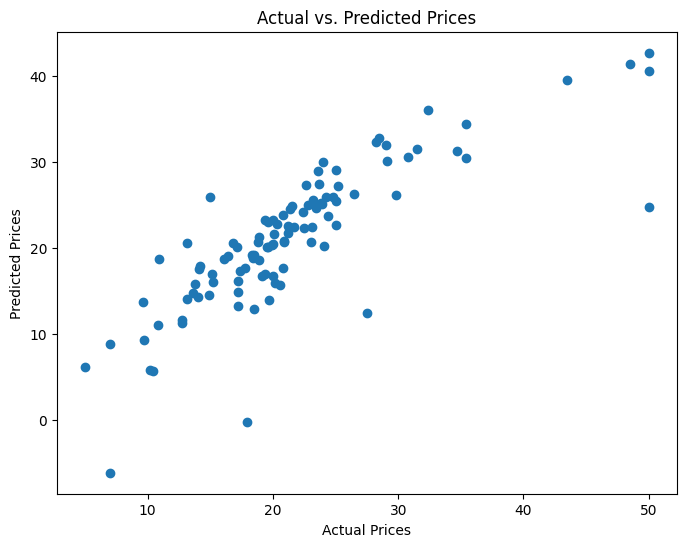

In [15]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


In [16]:
# Calculate residuals
residuals = y_test - y_pred
print("Residuals:", residuals[:5])  # Display first 5 residuals


Residuals: 173   -5.396724
274   -3.625565
491   -1.216944
72    -2.231979
452   -2.669880
Name: MEDV, dtype: float64


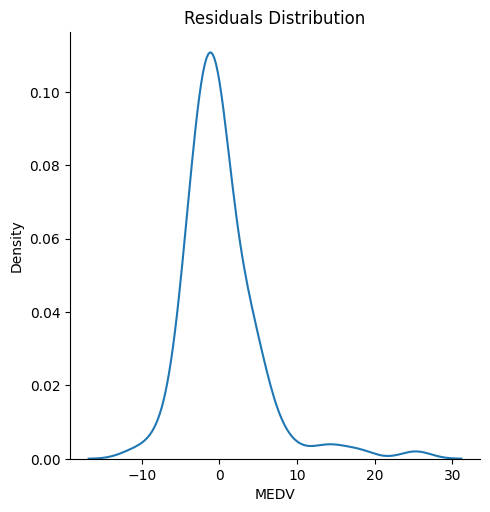

In [17]:
# Plot the residuals (density plot)
sns.displot(residuals, kind="kde")
plt.title("Residuals Distribution")
plt.show()

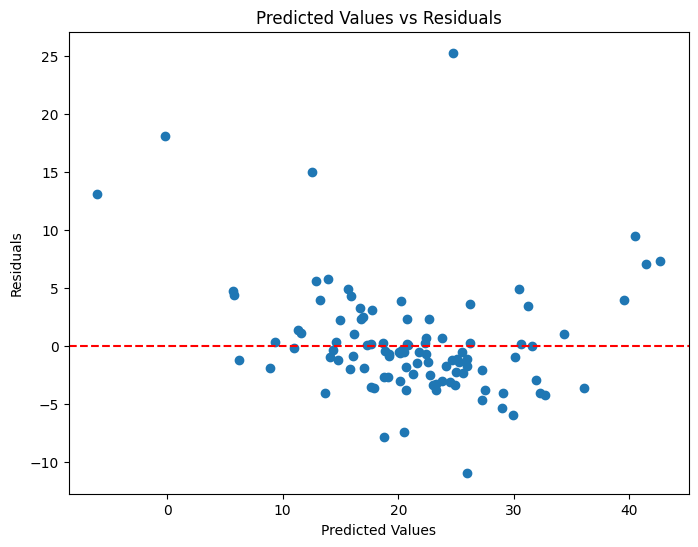

In [18]:
# Scatter plot of predictions vs residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 9: Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 3.1890919658879313
Mean Squared Error: 24.29111947497418
Root Mean Squared Error: 4.928602182665403
R-squared: 0.6687594935356229


In [20]:
# Step 10: Adjusted R-squared
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6198262368988399


In [21]:
# Step 11: New Data Prediction
# Replace with a new sample from your dataset
new_data = X.iloc[0].values.reshape(1, -1)  # Use the first row for prediction
new_prediction = regression.predict(new_data)
print("Prediction for New Data:", new_prediction)

Prediction for New Data: [29.95339638]


/Users/veerajvishnu/Documents/VSCode Python/BostonHousePrices/venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Step 12: Save the Model (Pickling for Deployment)
import pickle
pickle.dump(regression, open('regmodel.pkl', 'wb'))

# Load the pickled model
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

# Test the pickled model with the same new data
pickled_prediction = pickled_model.predict(new_data)
print("Prediction from Pickled Model:", pickled_prediction)

Prediction from Pickled Model: [29.95339638]


/Users/veerajvishnu/Documents/VSCode Python/BostonHousePrices/venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
